In [1]:
#Examine the relationship between race and BMI
import pandas as pd
df = pd.read_csv('/Users/lengyizhang/Downloads/NHANES.csv') 
#Source of Data: NHANES

In [2]:
#Retrieve the table
df.head()

,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,...,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregntNow
0,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
1,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
2,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
3,51625,2009_10,male,4,0-9,49.0,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51630,2009_10,female,49,40-49,596.0,White,NaN,Some College,LivePartner,...,No,NaN,Yes,Yes,12.0,10.0,1.0,Yes,Heterosexual,NaN


In [3]:
#select the columnns I want
data = df[['BMI', 'Race3']]

In [4]:
#show the two columns in a more concise table
data.head()

,BMI,Race3
0,32.22,NaN
1,32.22,NaN
2,32.22,NaN
3,15.30,NaN
4,30.57,NaN


In [5]:
#drop NaNs
data = data.dropna()

In [6]:
#define each level of BMI
def function(row):
    if row['BMI'] >= 40:
        return 'Severe Obesity'
    elif row['BMI'] >= 30:
        return 'Obesity'
    elif row['BMI'] >= 25:
        return 'Overweight'
    elif row['BMI'] >= 18.5:
        return 'Normal'
    elif row['BMI'] < 18.5:
        return 'Underweight'
    else:
        return 'NaN'

In [7]:
#define a new column
data['Obesity'] = data.apply(function, axis=1)

In [8]:
#add the new column into the table
table = pd.crosstab(index=data["Obesity"], columns=data["Race3"]) 

In [9]:
table

Race3,Asian,Black,Hispanic,Mexican,Other,White
Obesity,,,,,,
Normal,130,135,86,122,46,974
Obesity,25,162,87,115,27,711
Overweight,72,131,105,119,34,858
Severe Obesity,4,45,6,16,13,140
Underweight,46,95,56,80,30,364


In [10]:
#rearrange the order of rows
table = table.reindex(['Underweight','Normal','Overweight','Obesity','Severe Obesity'])
table

Race3,Asian,Black,Hispanic,Mexican,Other,White
Obesity,,,,,,
Underweight,46,95,56,80,30,364
Normal,130,135,86,122,46,974
Overweight,72,131,105,119,34,858
Obesity,25,162,87,115,27,711
Severe Obesity,4,45,6,16,13,140


In [11]:
#calculate the percentage of population from each race in different levels of BMI
table['Asian_per'] = table['Asian'] / sum(table['Asian'])
table['Black_per'] = table['Black'] / sum(table['Black'])
table['Hispanic_per'] = table['Hispanic'] / sum(table['Hispanic'])
table['Mexican_per'] = table['Mexican'] / sum(table['Mexican'])
table['Other_per'] = table['Other'] / sum(table['Other'])
table['White_per'] = table['White'] / sum(table['White'])

In [12]:
table

Race3,Asian,Black,Hispanic,Mexican,Other,White,Asian_per,Black_per,Hispanic_per,Mexican_per,Other_per,White_per
Obesity,,,,,,,,,,,,
Underweight,46,95,56,80,30,364,0.166065,0.167254,0.164706,0.176991,0.200000,0.119462
Normal,130,135,86,122,46,974,0.469314,0.237676,0.252941,0.269912,0.306667,0.319659
Overweight,72,131,105,119,34,858,0.259928,0.230634,0.308824,0.263274,0.226667,0.281588
Obesity,25,162,87,115,27,711,0.090253,0.285211,0.255882,0.254425,0.180000,0.233344
Severe Obesity,4,45,6,16,13,140,0.014440,0.079225,0.017647,0.035398,0.086667,0.045947


In [13]:
#apply all the extensions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from scipy.stats import chi2_contingency

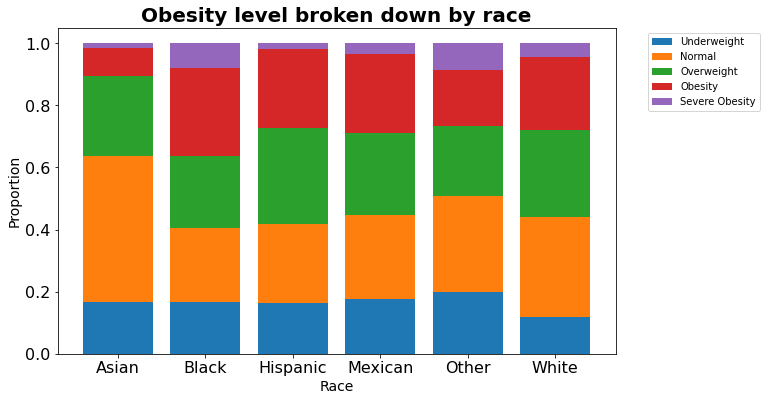

In [14]:
#visualize the proportion of population of each race regarding levels of obesity
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

per_cols = ['Asian_per', 'Black_per', 'Hispanic_per', 'Mexican_per', 'Other_per', 'White_per']
labels = ['Asian', 'Black', 'Hispanic', 'Mexican', 'Other', 'White']
y_value1 = y_value1 = table[per_cols].loc['Underweight']
y_value2 = y_value2 = table[per_cols].loc['Normal']
y_value3 = y_value3 = table[per_cols].loc['Overweight']
y_value4 = y_value4 = table[per_cols].loc['Obesity']
y_value5 = y_value5 = table[per_cols].loc['Severe Obesity']

fig, axs = plt.subplots(figsize=(10,6))

p1 = axs.bar(labels, y_value1) 
p2 = axs.bar(labels, y_value2, bottom = y_value1)
p3 = axs.bar(labels, y_value3, bottom = (y_value1 + y_value2))
p4 = axs.bar(labels, y_value4, bottom = (y_value1 + y_value2 + y_value3))
p5 = axs.bar(labels, y_value5, bottom = (y_value1 + y_value2 + y_value3 + y_value4))

axs.set_title("Obesity level broken down by race", fontsize = 20, fontweight = "bold")   
axs.set_xlabel("Race", fontsize=14)
axs.set_ylabel("Proportion", fontsize=14)
axs.tick_params(labelsize=16)  
axs.legend((p1[0],p2[0],p3[0],p4[0],p5[0]),['Underweight','Normal','Overweight','Obesity','Severe Obesity'],
           bbox_to_anchor=(1.05, 1))

plt.show() 

In [15]:
#calculate the means with 95% CI 
def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))

In [16]:
#define a structure to select data of each race
asian_df = df[df['Race3'] == 'Asian'] 
black_df = df[df['Race3'] == 'Black'] 
white_df = df[df['Race3'] == 'White'] 

In [17]:
#calculate the mean of asians' BMI with 95% CI
CI_mean(asian_df['BMI'])

Average is: 23.651263537906114
95% CI of mean is: (22.99657864616456, 24.305948429647668)


In [18]:
#calculate the mean of black people's BMI with 95% CI
CI_mean(black_df['BMI'])

Average is: 27.57323943661972
95% CI of mean is: (26.87144595042435, 28.27503292281509)


In [19]:
#calculate the mean of white people's BMI with 95% CI
CI_mean(white_df['BMI'])

Average is: 26.59891696750879
95% CI of mean is: (26.350478427735922, 26.847355507281655)


In [20]:
#define the function to calculate mean difference with 95% CI
def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [21]:
#calculate the mean difference between asian people's and white people's BMI with 95% CI
CI_mean_diff(asian_df['BMI'], white_df['BMI'])

The average difference is: -2.947653429602674
The 95% CI is: (-3.6478919714718874, -2.247414887733461)


In [22]:
#calculate the mean difference between black people's and white people's BMI with 95% CI
CI_mean_diff(black_df['BMI'], white_df['BMI'])

The average difference is: 0.9743224691109305
The 95% CI is: (0.22985231839249676, 1.7187926198293642)


In [23]:
#conduct a two-sample t-test between asian people's BMI and white people's BMI
t_val, p_val = stats.ttest_ind(asian_df['BMI'].dropna(),
                               white_df['BMI'].dropna(), equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val) 

Test statistic: -8.083857108498991
p-value: 9.6875191243374e-15


In [24]:
#conduct a two-sample t-test between black people's BMI and white people's BMI
t_val, p_val = stats.ttest_ind(white_df['BMI'].dropna(),
                               black_df['BMI'].dropna(), equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val) 

Test statistic: -2.5180744003822264
p-value: 0.012017291461856464


In [25]:
#Examine the relationship between race and income
df.head()
#Source of Data: NHANES

,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,...,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregntNow
0,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
1,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
2,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
3,51625,2009_10,male,4,0-9,49.0,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51630,2009_10,female,49,40-49,596.0,White,NaN,Some College,LivePartner,...,No,NaN,Yes,Yes,12.0,10.0,1.0,Yes,Heterosexual,NaN


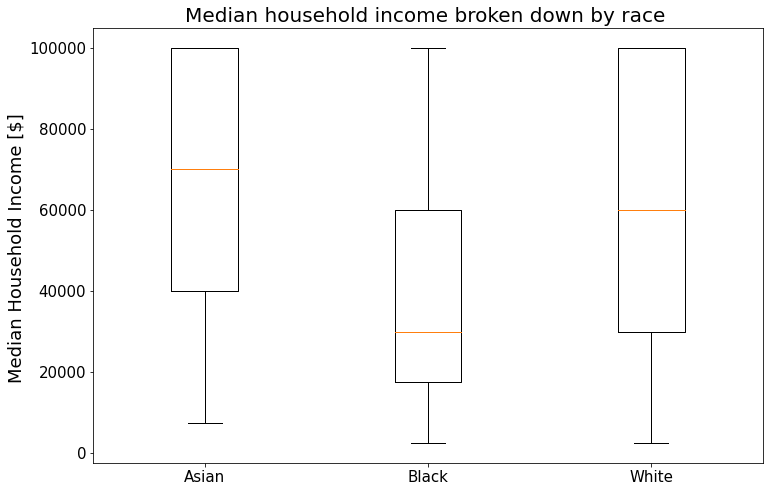

In [26]:
#visualize the median household income based on race
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([asian_df['HHIncomeMid'].dropna(), black_df['HHIncomeMid'].dropna(), white_df['HHIncomeMid'].dropna()])
plt.title('Median household income broken down by race ', fontsize=20)
axs.set_xticklabels(['Asian','Black','White'])
axs.set_ylabel('Median Household Income [$] ', fontsize=18)
axs.tick_params(labelsize=15)
plt.show() 

In [27]:
#calculate the mean of asian people's median household income with 95% CI
CI_mean(asian_df['HHIncomeMid'])

Average is: 65313.76518218624
95% CI of mean is: (61494.0634055579, 69133.46695881458)


In [28]:
#calculate the mean of black people's median household income with 95% CI
CI_mean(black_df['HHIncomeMid'])

Average is: 42086.57587548638
95% CI of mean is: (39581.7954213934, 44591.35632957936)


In [29]:
#calculate the mean of white people's median household income with 95% CI
CI_mean(white_df['HHIncomeMid'])

Average is: 63055.555555555555
95% CI of mean is: (61899.52281309778, 64211.58829801333)


In [30]:
#calculate the mean difference between asian people's and white people's median household income with 95% CI
CI_mean_diff(asian_df['HHIncomeMid'], white_df['HHIncomeMid'])

The average difference is: 2258.2096266306835
The 95% CI is: (-1732.5964779066112, 6249.015731167978)


In [31]:
#calculate the mean difference between asian people's and black people's median household income with 95% CI
CI_mean_diff(asian_df['HHIncomeMid'], black_df['HHIncomeMid'])

The average difference is: 23227.18930669986
The 95% CI is: (18659.47140980825, 27794.90720359147)


In [32]:
#conduct a two-sample t-test between asian people's and white people's median household income
t_val, p_val = stats.ttest_ind(asian_df['HHIncomeMid'].dropna(),
                               white_df['HHIncomeMid'].dropna(), equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 1.029260836464263
p-value: 0.3042202587418382


In [33]:
#conduct a two-sample t-test between asian people's and black people's median household income
t_val, p_val = stats.ttest_ind(asian_df['HHIncomeMid'].dropna(),
                               black_df['HHIncomeMid'].dropna(), equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 9.238214177277982
p-value: 9.413145599388817e-19


In [34]:
#Examine the relationship between race and education level
#Select the two columns of data that I want to focus on
data_no2 = df[['Race3','Education']]
#Source of Data: NHANES

In [35]:
#show the datatable
data_no2.head()

,Race3,Education
0,NaN,High School
1,NaN,High School
2,NaN,High School
3,NaN,NaN
4,NaN,Some College


In [36]:
#drop the NaNs
data_no2 = data_no2.dropna()

In [37]:
#show the table after dropping the NaNs
data_no2.head()

,Race3,Education
5001,Black,High School
5002,White,College Grad
5003,White,College Grad
5005,White,College Grad
5006,White,High School


In [38]:
#define each level of education for the convenience of calculating the numbers of people
def function(row):
    if row['Education'] == 'College Grad':
        return 'Bachelor'
    elif row['Education'] == 'Some College':
        return 'College Dropout'
    elif row['Education'] == 'High School':
        return 'High School Graduate'
    elif row['Education'] == '9 - 11th Grade':
        return 'High School Dropout'
    elif row['Education'] == '8th Grade':
        return 'Middle School'
    else:
        return 'NaN'

In [39]:
#define a new column
data_no2['Education Level'] = data_no2.apply(function, axis=1)

In [40]:
#add a new column to the table
table_no2 = pd.crosstab(index=data_no2["Education Level"], columns=data_no2["Race3"]) 

In [41]:
#show the table
table_no2

Race3,Asian,Black,Hispanic,Mexican,Other,White
Education Level,,,,,,
Bachelor,110,76,34,23,15,870
College Dropout,56,152,53,54,46,799
High School Dropout,13,63,45,68,9,207
High School Graduate,15,94,57,61,16,436
Middle School,15,11,43,65,3,75


In [42]:
#organize the order of rows
table_no3 = table_no2.reindex(['Bachelor','College Dropout','High School Graduate','High School Dropout','Middle School'])

In [43]:
#show the table
table_no3

Race3,Asian,Black,Hispanic,Mexican,Other,White
Education Level,,,,,,
Bachelor,110,76,34,23,15,870
College Dropout,56,152,53,54,46,799
High School Graduate,15,94,57,61,16,436
High School Dropout,13,63,45,68,9,207
Middle School,15,11,43,65,3,75


In [44]:
#define the rule for calculating the percentage of people in each educational level based on race
table_no3['Asian_per'] = table_no3['Asian'] / sum(table_no3['Asian'])
table_no3['Black_per'] = table_no3['Black'] / sum(table_no3['Black'])
table_no3['Hispanic_per'] = table_no3['Hispanic'] / sum(table_no3['Hispanic'])
table_no3['Mexican_per'] = table_no3['Mexican'] / sum(table_no3['Mexican'])
table_no3['Other_per'] = table_no3['Other'] / sum(table_no3['Other'])
table_no3['White_per'] = table_no3['White'] / sum(table_no3['White'])

In [45]:
asian_per = table_no3['Asian_per']
black_per = table_no3['Black_per']
white_per = table_no3['White_per'] 

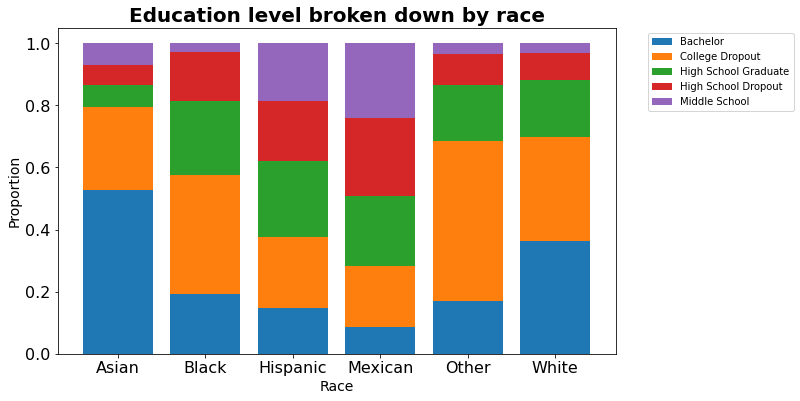

In [46]:
#visualize the percentage of each educational level in population based on their races
per_cols = ['Asian_per', 'Black_per', 'Hispanic_per', 'Mexican_per', 'Other_per', 'White_per']
labels = ['Asian', 'Black', 'Hispanic', 'Mexican', 'Other', 'White']
y_value1 = y_value1 = table_no3[per_cols].loc['Bachelor']
y_value2 = y_value2 = table_no3[per_cols].loc['College Dropout']
y_value3 = y_value3 = table_no3[per_cols].loc['High School Graduate']
y_value4 = y_value4 = table_no3[per_cols].loc['High School Dropout']
y_value5 = y_value5 = table_no3[per_cols].loc['Middle School']

fig, axs = plt.subplots(figsize=(10,6))

p1 = axs.bar(labels, y_value1) 
p2 = axs.bar(labels, y_value2, bottom = y_value1)
p3 = axs.bar(labels, y_value3, bottom = (y_value1 + y_value2))
p4 = axs.bar(labels, y_value4, bottom = (y_value1 + y_value2 + y_value3))
p5 = axs.bar(labels, y_value5, bottom = (y_value1 + y_value2 + y_value3 + y_value4))

axs.set_title("Education level broken down by race", fontsize = 20, fontweight = "bold")   
axs.set_xlabel("Race", fontsize=14)
axs.set_ylabel("Proportion", fontsize=14)
axs.tick_params(labelsize=16)  
axs.legend((p1[0],p2[0],p3[0],p4[0],p5[0]),['Bachelor','College Dropout','High School Graduate','High School Dropout','Middle School'],
           bbox_to_anchor=(1.05, 1))

plt.show() 

In [47]:
#calculate the proportion with 95% CI 
def CI_prop(s, n):
    p = s / n
    se2 = p * (1-p) / n
    se = np.sqrt(se2)
    low = p - 1.96 * se
    up = p + 1.96 * se
    print('Sample proportion is:', p)
    print('95% CI is: ({}, {})'.format(low, up))

In [48]:
#proportion of asian people who have a bachelor degree among all college graduate in this dataset, with 95% CI
CI_prop(110,1128)

Sample proportion is: 0.0975177304964539
95% CI is: (0.08020511620515919, 0.11483034478774862)


In [49]:
#proportion of non-asian people who  have a bachelor degree among all college graduate in this dataset, with 95% CI
CI_prop(1018,1128)

Sample proportion is: 0.9024822695035462
95% CI is: (0.8851696552122514, 0.9197948837948409)


In [50]:
#define how to calculate proportion difference with 95% CI
def CI_prop_diff(s1, s2, n1, n2):
    p1 = s1 / n1
    p2 = s2 / n2
    se2p1 = p1 * (1 - p1) / n1
    se2p2 = p2 * (1 - p2) / n2
    se2 = se2p1 + se2p2
    se = np.sqrt(se2)
    low = (p1 - p2) - 1.96 * se
    up = (p1 - p2) + 1.96 * se
    print("Proportion difference is:", p1 - p2)
    print("95% CI is: ({}, {})".format(low, up))

In [51]:
#calculate the proportion difference between Asian people who have a bachelor degree and non-Asian people who have a bachelor degree
CI_prop_diff(s1=110,s2=1018,n1=209,n2=3375)

Proportion difference is: 0.22468615984405454
95% CI is: (0.1552436799031806, 0.2941286397849285)


In [52]:
#I was not sure how to narrow down the dataframe, so I created another csv based on our calculations above.
import pandas as pd
sub_df = pd.read_csv('/Users/lengyizhang/Downloads/subdata.csv') 

In [53]:
#show the table
sub_df

,Race,Bachelor,Non-bachelor
0,Asian,110,99
1,Non-Asian,1018,3375


In [54]:
#define my shortcut
table = sub_df[['Bachelor','Non-bachelor']] 

In [55]:
#conduct the chi-squared test between Asian and Bachelor
chi2, p, dof, expected = stats.chi2_contingency(table)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected) 

chi2: 91.98370072339345
p: 8.739333174861634e-22
dof: 1
expected: [[  51.22816167  157.77183833]
 [1076.77183833 3316.22816167]]


In [56]:
#calculate the sum of each cell
110+99+1018+3375

4602

In [57]:
#Examine the relationship between income and BMI
data_no3 = df[['HHIncomeMid','BMI']].dropna() 
#Source of Data: NHANES

In [58]:
#show the table
data_no3.head()

,HHIncomeMid,BMI
0,30000.0,32.22
1,30000.0,32.22
2,30000.0,32.22
3,22500.0,15.30
4,40000.0,30.57


In [59]:
#define the dataframe
Income_BMI_df = df[['HHIncomeMid', 'BMI']]
Income_BMI_df = df[['HHIncomeMid', 'BMI']].dropna()

In [60]:
#apply the python extension
!pip install statsmodels --user

In [61]:
#apply the simple regression analysis
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = Income_BMI_df['HHIncomeMid'].values
y_vals = Income_BMI_df['BMI']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     35.89
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           2.17e-09
Time:                        00:13:41   Log-Likelihood:                -30283.
No. Observations:                8852   AIC:                         6.057e+04
Df Residuals:                    8850   BIC:                         6.058e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.5116      0.158    174.113      0.000      27.202      27.821
x1         -1.429e-05   2.39e-06     -5.990      0.000    -1.9e-05   -9.62e-06
==============================================================================
Omnibus:                     1298.127   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2827.682
Skew:                           0.873   Prob(JB):                         0.00
Kurtosis:                       5.149   Cond. No.                     1.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
#Regression Equation:
#BMI = HHIncome[US$10,000]*-1.429e-05 + 27.5116
#slope -1.429e-05 95% CI[-1.668e-05, -1.19e-05]


In [63]:
#define the regression parameter
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(df['HHIncomeMid']),np.max(df['HHIncomeMid']), 100)

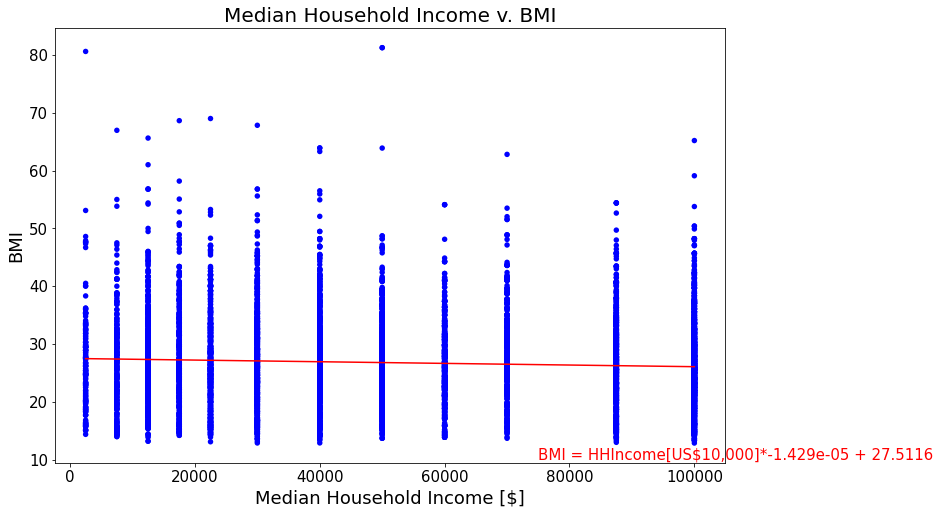

In [64]:
#visualize the relationship between median household income and BMI
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(Income_BMI_df['HHIncomeMid'], Income_BMI_df['BMI'], c='blue',
            edgecolors='none', s=30)

plt.title("Median Household Income v. BMI", fontsize=20)
axs.set_xlabel("Median Household Income [$]", fontsize=18)
axs.set_ylabel("BMI", fontsize=18)

axs.plot(x_plot, x_plot*b1 + b0, color='red')
axs.tick_params(labelsize=15)
plt.text(75000,10,'BMI = HHIncome[US$10,000]*-1.429e-05 + 27.5116', fontsize=15 , color = 'red')
plt.show()

In [65]:
#calculate the correlation coefficient and p-value
from scipy import stats
corr = stats.pearsonr(Income_BMI_df['HHIncomeMid'], Income_BMI_df['BMI'])
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])

Correlation coefficient: -0.06354937675983952
p-value: 2.1738634496675665e-09


In [66]:
#Examine the relationship between education and income
data_no4 = df[['Race3','HHIncomeMid','Gender']].dropna()
#Source of Data: NHANES

In [67]:
#Present the three columns of data that I want to engage with.
data_no4

,Race3,HHIncomeMid,Gender
5000,Asian,100000.0,male
5001,Black,22500.0,female
5002,White,70000.0,male
5003,White,70000.0,male
5004,White,12500.0,male
...,...,...,...
9995,Mexican,7500.0,male
9996,White,87500.0,female
9997,Mexican,87500.0,male
9998,White,70000.0,male


In [68]:
#define some shortcut terms to access a certain group of data
male = df['Gender'] == 'male'
female = df['Gender'] == 'female'
asian = df['Race3'] == 'Asian'
white = df['Race3'] == 'White'

In [69]:
#narrow down the dataframe to select data that fulfill the requirement of both categories
asian_male_df = df[male & asian]
asian_female_df = df[female & asian]
white_male_df = df[male & white]
white_female_df = df[female & white]

In [70]:
#define some shortcuts and drop the NaNs.
asianmale = asian_male_df['HHIncomeMid'].dropna()
asianfemale = asian_female_df['HHIncomeMid'].dropna()
whitemale = white_male_df['HHIncomeMid'].dropna()
whitefemale = white_female_df['HHIncomeMid'].dropna()

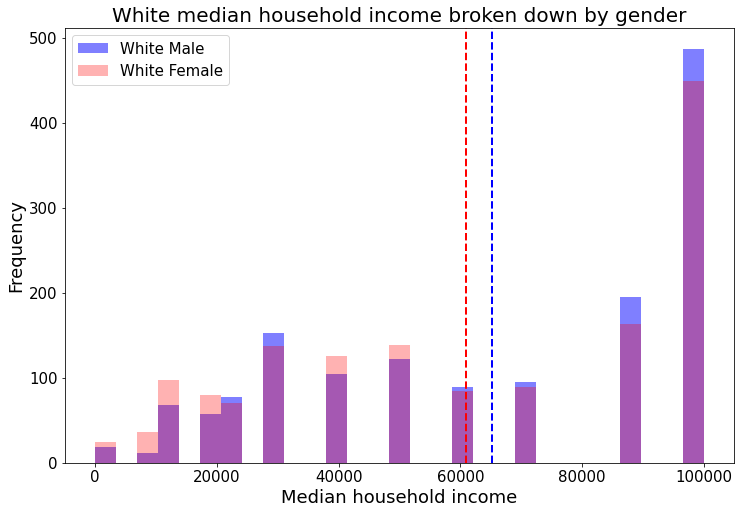

In [71]:
#visualize the contrast between Asian men's and Asian women's income
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(12,8))
axs.hist(whitemale, color="b", alpha=0.5, 
         bins=np.linspace(0,100000,30), label="White Male")
axs.hist(whitefemale, color="r", alpha=0.3,
         bins=np.linspace(0,100000,30), label="White Female")
plt.title("White median household income broken down by gender", fontsize=20)
axs.set_xlabel("Median household income", fontsize=18)
axs.set_ylabel("Frequency", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})
axs.axvline(np.mean(whitemale), color='b', ls='dashed', lw=2)
axs.axvline(np.mean(whitefemale), color='r', ls='dashed', lw=2)
plt.show() 

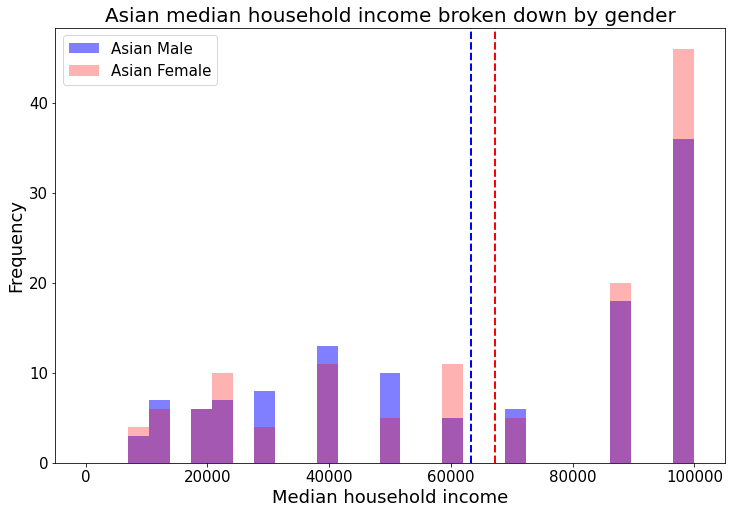

In [72]:
#visualize the contrast between white men's and white women's income
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(12,8))
axs.hist(asianmale, color="b", alpha=0.5, 
         bins=np.linspace(0,100000,30), label="Asian Male")
axs.hist(asianfemale, color="r", alpha=0.3,
         bins=np.linspace(0,100000,30), label="Asian Female")
plt.title("Asian median household income broken down by gender", fontsize=20)
axs.set_xlabel("Median household income", fontsize=18)
axs.set_ylabel("Frequency", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})
axs.axvline(np.mean(asianmale), color='b', ls='dashed', lw=2)
axs.axvline(np.mean(asianfemale), color='r', ls='dashed', lw=2)
plt.show() 

In [73]:
#calculate the mean of Asian men's income with 95% CI
CI_mean(asianmale)

Average is: 63256.3025210084
95% CI of mean is: (57347.642660477795, 69164.96238153901)


In [74]:
#calculate the mean of Asian women's income with 95% CI
CI_mean(asianfemale)

Average is: 67226.5625
95% CI of mean is: (61486.86780997204, 72966.25719002796)


In [75]:
#calculate the mean of white men's income with 95% CI
CI_mean(whitemale)

Average is: 65208.192281651995
95% CI of mean is: (63558.52373225502, 66857.86083104898)


In [76]:
#calculate the mean of white women's income with 95% CI
CI_mean(whitefemale)

Average is: 60925.98794373744
95% CI of mean is: (59224.38150100767, 62627.59438646721)


In [77]:
#calculate the mean of the difference between Asian men's and Asian women's income with 95% CI
CI_mean_diff(asianmale, asianfemale)

The average difference is: -3970.2599789915985
The 95% CI is: (-12207.756958182588, 4267.237000199391)


In [78]:
#calculate the mean of the difference between white men's and white women's income with 95% CI
CI_mean_diff(whitemale, whitefemale)

The average difference is: 4282.204337914554
The 95% CI is: (1912.210496401673, 6652.198179427436)


In [79]:
#conduct a two-sample test between asian men's and asian women's income
t_val, p_val = stats.ttest_ind(asianmale,
                               asianfemale.dropna(), equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val) 

Test statistic: -0.940827629102861
p-value: 0.3477239382980294


In [80]:
#conduct a two-sample test between white men's and white women's income
t_val, p_val = stats.ttest_ind(whitemale,
                               asianmale.dropna(), equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val) 

Test statistic: 0.6211722509154703
p-value: 0.5355192486704112
